# Convolutional Neural Networks: Application
In this project, we will:

- Create a mood classifer using the TF Keras Sequential API
- Build a ConvNet to identify sign language digits using the TF Keras Functional API

**After this project we will be able to:**

- Build and train a ConvNet in TensorFlow for a __binary__ classification problem
- Build and train a ConvNet in TensorFlow for a __multiclass__ classification problem
- Explain different use cases for the Sequential and Functional APIs


<a name='1'></a>
## 1 - Packages

As usual, begin by loading in the packages.

In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

<a name='1-1'></a>
### 1.1 - Load the Data and Split the Data into Train/Test Sets

we'll be using the Happy House dataset for this part of the project, which contains images of peoples' faces. our task will be to build a ConvNet that determines whether the people in the images are smiling or not -- because they only get to enter the house if they're smiling!  

In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


we can display the images contained in the dataset. Images are **64x64** pixels in RGB format (3 channels).

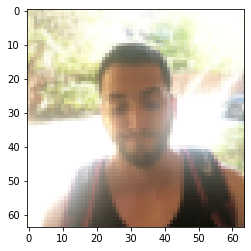

In [3]:
index = 124
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

<a name='2'></a>
## 2 - Layers in TF Keras 

In TF Keras, we don't have to write code directly to create layers. Rather, TF Keras has pre-defined layers we can use. 

When we create a layer in TF Keras, we are creating a function that takes some input and transforms it into an output we can reuse later. Nice and easy! 

<a name='3'></a>
## 3 - The Sequential API
Keras is a high-level abstraction built on top of TensorFlow, which allows for even more simplified and optimized model creation and training. 

For the first part of this project, we'll create a model using TF Keras' Sequential API, which allows us to build layer by layer, and is ideal for building models where each layer has **exactly one** input tensor and **one** output tensor. 

As we'll see, using the Sequential API is simple and straightforward, but is only appropriate for simpler, more straightforward tasks. Later in this project we'll spend some time building with a more flexible, poourful alternative: the Functional API. 
 

<a name='3-1'></a>
### 3.1 - Create the Sequential Model

As mentioned earlier, the TensorFlow Keras Sequential API can be used to build simple models with layer operations that proceed in a sequential order. 

We can also add layers incrementally to a Sequential model with the `.add()` method, or remove them using the `.pop()` method, much like we would in a regular Python list.

Actually, we can think of a Sequential model as behaving like a list of layers. Like Python lists, Sequential layers are ordered, and the order in which they are specified matters.  If our model is non-linear or contains layers with multiple inputs or outputs, a Sequential model wouldn't be the right choice!

For any layer construction in Keras, we'll need to specify the input shape in advance. This is because in Keras, the shape of the weights is based on the shape of the inputs. The weights are only created when the model first sees some input data. Sequential models can be created by passing a list of layers to the Sequential constructor, like we will do in the next project.

<a name='ex-1'></a>
### happyModel

Implement the `happyModel` function below to build the following model: `ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE`. Take help from [tf.keras.layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers) 

Also, plug in the following parameters for all the steps:

 - [ZeroPadding2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ZeroPadding2D): padding 3, input shape 64 x 64 x 3
 - [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D): Use 32 7x7 filters, stride 1
 - [BatchNormalization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization): for axis 3
 - [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU)
 - [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D): Using default parameters
 - [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) the previous output.
 - Fully-connected ([Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)) layer: Apply a fully connected layer with 1 neuron and a sigmoid activation. 
 
 

In [33]:
def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, we'll hard-code all the values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    
    
    model = tf.keras.Sequential([
            tfl.ZeroPadding2D(padding=3, input_shape=(64,64,3)),
            tfl.Conv2D(filters=32,kernel_size=7,strides=1),
            tfl.BatchNormalization(axis=3),
            tfl.ReLU(),
            tfl.MaxPool2D(),
            tfl.Flatten(),
            tfl.Dense(units=1,activation='sigmoid')
            
        ])
   
    
    return model

In [34]:
happy_model = happyModel()
# Print a summary for each layer
for layer in summary(happy_model):
    print(layer)
    
output = [['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))],
            ['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform'],
            ['BatchNormalization', (None, 64, 64, 32), 128],
            ['ReLU', (None, 64, 64, 32), 0],
            ['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid'],
            ['Flatten', (None, 32768), 0],
            ['Dense', (None, 1), 32769, 'sigmoid']]
    
comparator(summary(happy_model), output)

['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))]
['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 64, 64, 32), 128]
['ReLU', (None, 64, 64, 32), 0]
['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid']
['Flatten', (None, 32768), 0]
['Dense', (None, 1), 32769, 'sigmoid']
All tests passed!


Now that our model is created, we can compile it for training with an optimizer and loss of our choice. When the string `accuracy` is specified as a metric, the type of accuracy used will be automatically converted based on the loss function used. This is one of the many optimizations built into TensorFlow that make our life easier! If we'd like to read more on how the compiler operates, check the docs [here](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile).

In [35]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

It's time to check our model's parameters with the `.summary()` method. This will display the types of layers we have, the shape of the outputs, and how many parameters are in each layer. 

In [36]:
happy_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_13 (ZeroPaddi (None, 70, 70, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_6 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
re_lu_6 (ReLU)               (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

<a name='3-2'></a>
### 3.2 - Train and Evaluate the Model

After creating the model, compiling it with our choice of optimizer and loss function, and doing a sanity check on its contents, we are now ready to build! 

Simply call `.fit()` to train. That's it! No need for mini-batching, saving, or complex backpropagation computations. That's all been done for we, as we're using a TensorFlow dataset with the batches specified already. we do have the option to specify epoch number or minibatch size if we like (for example, in the case of an un-batched dataset).

In [37]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 4s 98ms/step - loss: 1.6643 - accuracy: 0.6417
Epoch 2/10
38/38 [==============================] - 4s 95ms/step - loss: 0.2954 - accuracy: 0.8833
Epoch 3/10
38/38 [==============================] - 4s 97ms/step - loss: 0.1340 - accuracy: 0.9500
Epoch 4/10
38/38 [==============================] - 4s 95ms/step - loss: 0.1038 - accuracy: 0.9633
Epoch 5/10
38/38 [==============================] - 4s 95ms/step - loss: 0.0969 - accuracy: 0.9650
Epoch 6/10
38/38 [==============================] - 4s 97ms/step - loss: 0.0704 - accuracy: 0.9767
Epoch 7/10
38/38 [==============================] - 4s 95ms/step - loss: 0.0602 - accuracy: 0.9783
Epoch 8/10
38/38 [==============================] - 4s 95ms/step - loss: 0.0633 - accuracy: 0.9750
Epoch 9/10
38/38 [==============================] - 4s 95ms/step - loss: 0.1367 - accuracy: 0.9517
Epoch 10/10
38/38 [==============================] - 4s 95ms/step - loss: 0.1097 - accuracy: 0.9600


After that completes, just use `.evaluate()` to evaluate against our test set. This function will print the value of the loss function and the performance metrics specified during the compilation of the model. In this case, the `binary_crossentropy` and the `accuracy` respectively.

In [38]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 34ms/step - loss: 0.4058 - accuracy: 0.7867


[0.405800998210907, 0.7866666913032532]

But what if we need to build a model with shared layers, branches, or multiple inputs and outputs? This is where Sequential, with its beautifully simple yet limited functionality, won't be able to help we. 

Next up: Enter the Functional API, our slightly more complex, highly flexible friend.  

<a name='4'></a>
## 4 - The Functional API

Here we'll use Keras' flexible [Functional API](https://www.tensorflow.org/guide/keras/functional) to build a ConvNet that can differentiate between 6 sign language digits. 

The Functional API can handle models with non-linear topology, shared layers, as well as layers with multiple inputs or outputs. Imagine that, where the Sequential API requires the model to move in a linear fashion through its layers, the Functional API allows much more flexibility. Where Sequential is a straight line, a Functional model is a graph, where the nodes of the layers can connect in many more ways than one. 


<a name='4-1'></a>
### 4.1 - Load the SIGNS Dataset

As a reminder, the SIGNS dataset is a collection of 6 signs representing numbers from 0 to 5.

In [39]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

y = 4


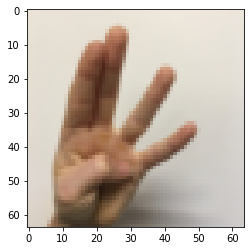

In [40]:
# Example of an image from the dataset
index = 9
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

<a name='4-2'></a>
### 4.2 - Split the Data into Train/Test Sets


In [41]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


<a name='4-3'></a>
### 4.3 - Forward Propagation

In TensorFlow, there are built-in functions that implement the convolution steps for we. By now, we should be familiar with how TensorFlow builds computational graphs. In the [Functional API](https://www.tensorflow.org/guide/keras/functional), we create a graph of layers. This is what allows such great flexibility.

However, the following model could also be defined using the Sequential API since the information flow is on a single line.

Begin building our graph of layers by creating an input node that functions as a callable object:

- **input_img = tf.keras.Input(shape=input_shape):** 

Then, create a new node in the graph of layers by calling a layer on the `input_img` object: 

- **tf.keras.layers.Conv2D(filters= ... , kernel_size= ... , padding='same')(input_img):** Read the full documentation on [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D).

- **tf.keras.layers.MaxPool2D(pool_size=(f, f), strides=(s, s), padding='same'):** `MaxPool2D()` downsamples our input using a window of size (f, f) and strides of size (s, s) to carry out max pooling over each window.  For max pooling, we usually operate on a single example at a time and a single channel at a time. Read the full documentation on [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D).

- **tf.keras.layers.ReLU():** computes the elementwise ReLU of Z (which can be any shape). we can read the full documentation on [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU).

- **tf.keras.layers.Flatten()**: given a tensor "P", this function takes each training (or test) example in the batch and flattens it into a 1D vector.  

    * If a tensor P has the shape (batch_size,h,w,c), it returns a flattened tensor with shape (batch_size, k), where $k=h \times w \times c$.  "k" equals the product of all the dimension sizes other than the first dimension.
    
    * For example, given a tensor with dimensions [100, 2, 3, 4], it flattens the tensor to be of shape [100, 24], where 24 = 2 * 3 * 4.  we can read the full documentation on [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten).

- **tf.keras.layers.Dense(units= ... , activation='softmax')(F):** given the flattened input F, it returns the output computed using a fully connected layer. we can read the full documentation on [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense).

In the last function above (`tf.keras.layers.Dense()`), the fully connected layer automatically initializes weights in the graph and keeps on training them as we train the model. Hence, we did not need to initialize those weights when initializing the parameters.

Lastly, before creating the model, we'll need to define the output using the last of the function's compositions (in this example, a Dense layer): 

- **outputs = tf.keras.layers.Dense(units=6, activation='softmax')(F)**


#### Window, kernel, filter, pool

The words "kernel" and "filter" are used to refer to the same thing. The word "filter" accounts for the amount of "kernels" that will be used in a single convolution layer. "Pool" is the name of the operation that takes the max or average value of the kernels. 

This is why the parameter `pool_size` refers to `kernel_size`, and we use `(f,f)` to refer to the filter size. 

Pool size and kernel size refer to the same thing in different objects - They refer to the shape of the window where the operation takes place. 

<a name='ex-2'></a>
### convolutional_model

Implement the `convolutional_model` function below to build the following model: `CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE`. Use the functions above! 

Also, plug in the following parameters for all the steps:

 - [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D): Use 8 4 by 4 filters, stride 1, padding is "SAME"
 - [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU)
 - [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D): Use an 8 by 8 filter size and an 8 by 8 stride, padding is "SAME"
 - **Conv2D**: Use 16 2 by 2 filters, stride 1, padding is "SAME"
 - **ReLU**
 - **MaxPool2D**: Use a 4 by 4 filter size and a 4 by 4 stride, padding is "SAME"
 - [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) the previous output.
 - Fully-connected ([Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)) layer: Apply a fully connected layer with 6 neurons and a softmax activation. 

In [58]:
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, we'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """

    input_img = tf.keras.Input(shape=input_shape)
    Z1 = tfl.Conv2D(filters=8,kernel_size=(4,4),padding='same')(input_img)
    relu1 = tfl.ReLU()
    A1 = relu1(Z1)
    P1 = tfl.MaxPool2D(pool_size=(8,8),strides=(8,8),padding='same')(A1)
    Z2 = tfl.Conv2D(filters=16,kernel_size=(2,2),padding='same')(P1)
    relu2 = tfl.ReLU()
    A2 = relu2(Z2)
    P2 = tfl.MaxPool2D(pool_size=(4,4),strides=(4,4),padding='same')(A2)
    F = tfl.Flatten()(P2)
    outputs = tfl.Dense(units=6, activation='softmax')(F)
    
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [59]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()
    
output = [['InputLayer', [(None, 64, 64, 3)], 0],
        ['Conv2D', (None, 64, 64, 8), 392, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 64, 64, 8), 0],
        ['MaxPooling2D', (None, 8, 8, 8), 0, (8, 8), (8, 8), 'same'],
        ['Conv2D', (None, 8, 8, 16), 528, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 8, 8, 16), 0],
        ['MaxPooling2D', (None, 2, 2, 16), 0, (4, 4), (4, 4), 'same'],
        ['Flatten', (None, 64), 0],
        ['Dense', (None, 6), 390, 'softmax']]
    
comparator(summary(conv_model), output)

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 64, 64, 8)         392       
_________________________________________________________________
re_lu_13 (ReLU)              (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 8, 16)          528       
_________________________________________________________________
re_lu_14 (ReLU)              (None, 8, 8, 16)          0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 2, 2, 16)         

Both the Sequential and Functional APIs return a TF Keras model object. The only difference is how inputs are handled inside the object model.

<a name='4-4'></a>
### 4.4 - Train the Model

In [60]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 2s 112ms/step - loss: 1.8091 - accuracy: 0.1667 - val_loss: 1.7886 - val_accuracy: 0.1667
Epoch 2/100
17/17 [==============================] - 2s 111ms/step - loss: 1.7898 - accuracy: 0.1796 - val_loss: 1.7827 - val_accuracy: 0.2750
Epoch 3/100
17/17 [==============================] - 2s 111ms/step - loss: 1.7867 - accuracy: 0.1796 - val_loss: 1.7790 - val_accuracy: 0.2917
Epoch 4/100
17/17 [==============================] - 2s 106ms/step - loss: 1.7847 - accuracy: 0.1898 - val_loss: 1.7765 - val_accuracy: 0.3167
Epoch 5/100
17/17 [==============================] - 2s 106ms/step - loss: 1.7823 - accuracy: 0.2185 - val_loss: 1.7728 - val_accuracy: 0.3083
Epoch 6/100
17/17 [==============================] - 2s 111ms/step - loss: 1.7800 - accuracy: 0.2157 - val_loss: 1.7689 - val_accuracy: 0.3000
Epoch 7/100
17/17 [==============================] - 2s 106ms/step - loss: 1.7770 - accuracy: 0.2389 - val_loss: 1.7638 - val_accuracy: 0.3167

Epoch 58/100
17/17 [==============================] - 2s 106ms/step - loss: 0.7427 - accuracy: 0.7472 - val_loss: 0.7023 - val_accuracy: 0.7667
Epoch 59/100
17/17 [==============================] - 2s 111ms/step - loss: 0.7352 - accuracy: 0.7491 - val_loss: 0.6963 - val_accuracy: 0.7667
Epoch 60/100
17/17 [==============================] - 2s 111ms/step - loss: 0.7279 - accuracy: 0.7500 - val_loss: 0.6903 - val_accuracy: 0.7583
Epoch 61/100
17/17 [==============================] - 2s 107ms/step - loss: 0.7199 - accuracy: 0.7546 - val_loss: 0.6857 - val_accuracy: 0.7583
Epoch 62/100
17/17 [==============================] - 2s 111ms/step - loss: 0.7130 - accuracy: 0.7583 - val_loss: 0.6784 - val_accuracy: 0.7833
Epoch 63/100
17/17 [==============================] - 2s 106ms/step - loss: 0.7064 - accuracy: 0.7593 - val_loss: 0.6750 - val_accuracy: 0.7750
Epoch 64/100
17/17 [==============================] - 2s 106ms/step - loss: 0.6996 - accuracy: 0.7667 - val_loss: 0.6688 - val_accuracy:

<a name='5'></a>
## 5 - History Object 

The history object is an output of the `.fit()` operation, and provides a record of all the loss and metric values in memory. It's stored as a dictionary that we can retrieve at `history.history`: 

In [62]:
history.history

{'loss': [1.8091126680374146,
  1.7897731065750122,
  1.7866631746292114,
  1.7846598625183105,
  1.7822991609573364,
  1.779999017715454,
  1.7769705057144165,
  1.773717999458313,
  1.7697958946228027,
  1.7639274597167969,
  1.7576258182525635,
  1.7508817911148071,
  1.7410615682601929,
  1.7278372049331665,
  1.7119238376617432,
  1.6914881467819214,
  1.6668776273727417,
  1.6394777297973633,
  1.6087499856948853,
  1.5757832527160645,
  1.5359452962875366,
  1.4944978952407837,
  1.4541404247283936,
  1.4133063554763794,
  1.3707406520843506,
  1.3313653469085693,
  1.2902979850769043,
  1.2506675720214844,
  1.215098261833191,
  1.182239294052124,
  1.151970624923706,
  1.1232268810272217,
  1.0964257717132568,
  1.0719923973083496,
  1.0490905046463013,
  1.02816641330719,
  1.0078892707824707,
  0.9895395636558533,
  0.9722667336463928,
  0.9549951553344727,
  0.9395889639854431,
  0.9237942099571228,
  0.9092991352081299,
  0.8953472971916199,
  0.8825314044952393,
  0.87027

Now visualize the loss over time using `history.history`: 

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

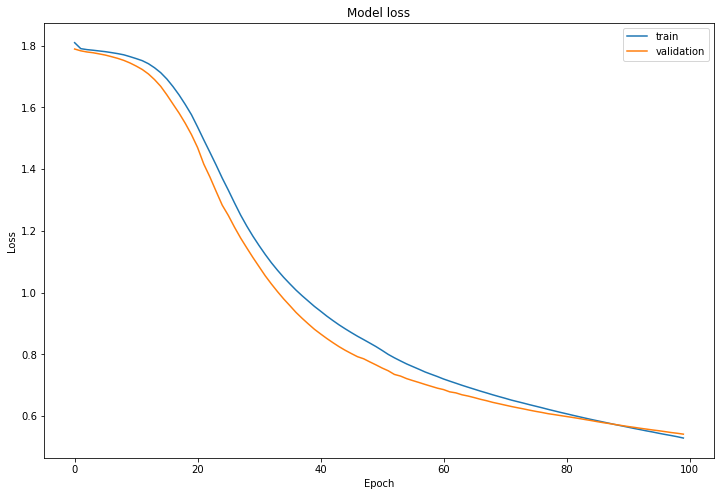

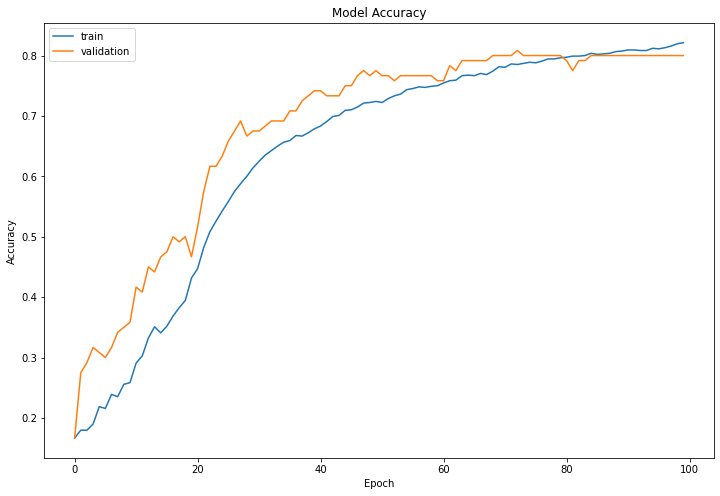

In [63]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

for more information read the official documentation. To that end, we can find the docs for the Sequential and Functional APIs here: 

https://www.tensorflow.org/guide/keras/sequential_model

https://www.tensorflow.org/guide/keras/functional